In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data_df = pd.read_csv("drive/MyDrive/Data/breast cancer.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

برای ثابت نگه داشتن مقادیر دستور زیر را میزنیم.

In [ ]:
SEED_VALUE = 0
#tf.keras.utils.set_random_seed(SEED_VALUE)
#tf.config.experimental.enable_op_determinism()
tf.random.set_seed(SEED_VALUE)

In [ ]:
import numpy as np

In [ ]:
data_df = pd.DataFrame(data_df)
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


در این قسمت میبینیم که داده نال نداریم

In [ ]:
print(data_df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

با توجه به اینکه این ستون اطلاعاتی به ما نمی دهد آن را حذف می کنیم.

In [ ]:
del data_df['Unnamed: 32']

با توجه به اینکه ID


اطلاعات شاخصی نمی دهد این ستون را حذف می کنیم.

In [ ]:
del data_df['id']

در این قست مجموعه داده را به دو قسمت بانسبت 80 به 100 . 20 به 100 به ترتیب به مجموعه داده آموزشی و آزمایشی تقسیم میکنیم.

In [ ]:
train = data_df.sample(frac=0.8, random_state=25)
test = data_df.drop(train.index)

In [ ]:
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
522,B,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613
120,B,11.41,10.82,73.34,403.3,0.09373,0.06685,0.035120,0.026230,0.1667,...,12.82,15.97,83.74,510.5,0.1548,0.23900,0.21020,0.08958,0.3016,0.08523
241,B,12.42,15.04,78.61,476.5,0.07926,0.03393,0.010530,0.011080,0.1546,...,13.20,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783
362,B,12.76,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.017810,0.1759,...,13.75,25.99,87.82,579.7,0.1298,0.18390,0.12550,0.08312,0.2744,0.07238
221,B,13.56,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,0.1962,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,M,15.66,23.20,110.20,773.5,0.11090,0.31140,0.317600,0.137700,0.2495,...,19.85,31.64,143.70,1226.0,0.1504,0.51720,0.61810,0.24620,0.3277,0.10190
193,M,12.34,26.86,81.15,477.4,0.10340,0.13530,0.108500,0.045620,0.1943,...,15.65,39.34,101.70,768.9,0.1785,0.47060,0.44250,0.14590,0.3215,0.12050
15,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,...,17.46,37.13,124.10,943.2,0.1678,0.65770,0.70260,0.17120,0.4218,0.13410
368,M,21.71,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.084650,0.1717,...,30.75,26.44,199.50,3143.0,0.1363,0.16280,0.28610,0.18200,0.2510,0.06494


In [ ]:
test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
14,M,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310
17,M,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420
20,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.07283,0.3184,0.08183
22,M,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,...,18.07,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.23930,0.4667,0.09946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,M,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,...,24.30,25.48,160.20,1809.0,0.1268,0.3135,0.4433,0.21480,0.3077,0.07569
547,B,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,...,10.83,22.04,71.08,357.4,0.1461,0.2246,0.1783,0.08333,0.2691,0.09479
562,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.23560,0.4089,0.14090
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.14180,0.2218,0.07820


تعداد داده ها را در هر قسمت میشماریم.

In [ ]:
train.count()

diagnosis                  455
radius_mean                455
texture_mean               455
perimeter_mean             455
area_mean                  455
smoothness_mean            455
compactness_mean           455
concavity_mean             455
concave points_mean        455
symmetry_mean              455
fractal_dimension_mean     455
radius_se                  455
texture_se                 455
perimeter_se               455
area_se                    455
smoothness_se              455
compactness_se             455
concavity_se               455
concave points_se          455
symmetry_se                455
fractal_dimension_se       455
radius_worst               455
texture_worst              455
perimeter_worst            455
area_worst                 455
smoothness_worst           455
compactness_worst          455
concavity_worst            455
concave points_worst       455
symmetry_worst             455
fractal_dimension_worst    455
dtype: int64

In [ ]:
test.count()

diagnosis                  114
radius_mean                114
texture_mean               114
perimeter_mean             114
area_mean                  114
smoothness_mean            114
compactness_mean           114
concavity_mean             114
concave points_mean        114
symmetry_mean              114
fractal_dimension_mean     114
radius_se                  114
texture_se                 114
perimeter_se               114
area_se                    114
smoothness_se              114
compactness_se             114
concavity_se               114
concave points_se          114
symmetry_se                114
fractal_dimension_se       114
radius_worst               114
texture_worst              114
perimeter_worst            114
area_worst                 114
smoothness_worst           114
compactness_worst          114
concavity_worst            114
concave points_worst       114
symmetry_worst             114
fractal_dimension_worst    114
dtype: int64

با استفاده از دستور زیر داده ها را به دو دسته برچسب گذاری می کنیم و برچسب صحیح و غلط به آنها می دهیم برچسب صحیح را به داده هایی می دهیم که برابر با مقدار علامت سوال باشد که در پیشتر اشاره کردیم این مقدار همان میسینگ ولیو داده ماست ماست و غلط را به داده های نظیر می کنیم مقدار داشته باشد یا به عبارتی برابر با علامت سوال نباشد

در صورتی که میسیگ ولیو ها با علامت سوال مشخص شده باشند، این دستور کاربرد دارد.

In [ ]:
df_bool_train = (train== '?')
print(df_bool_train)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
522      False        False         False           False      False   
120      False        False         False           False      False   
241      False        False         False           False      False   
362      False        False         False           False      False   
221      False        False         False           False      False   
..         ...          ...           ...             ...        ...   
258      False        False         False           False      False   
193      False        False         False           False      False   
15       False        False         False           False      False   
368      False        False         False           False      False   
486      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
522            False             False           False  

In [ ]:
df_bool_test = (test== '?')
print(df_bool_test)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
5        False        False         False           False      False   
14       False        False         False           False      False   
17       False        False         False           False      False   
20       False        False         False           False      False   
22       False        False         False           False      False   
..         ...          ...           ...             ...        ...   
535      False        False         False           False      False   
547      False        False         False           False      False   
562      False        False         False           False      False   
566      False        False         False           False      False   
567      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
5              False             False           False  

حال با استفاده از دستور زیر مقادیر ه برابر با صحیح را می بیابیم بدین صورت همان همانگونه که بیان کردیم این مقادیر برابر با میسینگ ولو ها میباشند بدین صورت به سادگی تعداد میسینگ ولو ها را بر حسب هر ویژگی پیدا میکنیم

In [ ]:
print(df_bool_train.sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
print(df_bool_test.sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


میبینیم که داده میس شده نداریم

حال نوع فیچر ها و برچسب را مشخص میکنیم.

In [ ]:
train.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

خود ستون تارگت عددی نیست آن را عددی میکنیم.(صرفا ماهیت عددی دارد)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['diagnosis']= label_encoder.fit_transform(train['diagnosis'])
test['diagnosis']= label_encoder.fit_transform(test['diagnosis'])
train=train.apply(pd.to_numeric)
test=test.apply(pd.to_numeric)

In [ ]:
train.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
test.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

نوع همه فیچر ها و تارگت عددی هستند.

حال نرمال سازی را روی داده ها انجام میدهیم

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train= pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test= pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

In [ ]:
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.180901,0.342239,0.168226,0.093409,0.293220,0.075916,0.011872,0.028151,0.291414,...,0.118851,0.410074,0.111281,0.052675,0.261705,0.048452,0.020232,0.097320,0.195545,0.138331
1,0.0,0.188504,0.037538,0.182904,0.099931,0.371039,0.145605,0.082287,0.130368,0.306566,...,0.151378,0.112408,0.148696,0.071184,0.552268,0.205402,0.167891,0.307835,0.286024,0.198019
2,0.0,0.239698,0.180250,0.220823,0.131340,0.240408,0.044629,0.024672,0.055070,0.245455,...,0.165266,0.237621,0.149255,0.079347,0.214819,0.048966,0.049864,0.139244,0.263355,0.083891
3,0.0,0.256931,0.308759,0.244280,0.139964,0.398393,0.184467,0.062980,0.088519,0.353030,...,0.185367,0.397553,0.169437,0.088354,0.387176,0.151944,0.100240,0.285636,0.232407,0.113735
4,0.0,0.297481,0.141698,0.292632,0.167725,0.473684,0.306178,0.184161,0.221223,0.455556,...,0.230319,0.145418,0.236948,0.114877,0.438685,0.235284,0.205831,0.312371,0.295683,0.175325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1.0,0.403923,0.456206,0.448122,0.258775,0.526045,0.895712,0.744142,0.684394,0.724747,...,0.408303,0.558338,0.453510,0.248710,0.523212,0.475313,0.493690,0.846048,0.337473,0.307359
451,1.0,0.235643,0.579980,0.239099,0.131726,0.458337,0.355561,0.254217,0.226740,0.445960,...,0.254806,0.777462,0.239998,0.135297,0.708776,0.430102,0.353435,0.501375,0.325251,0.429359
452,1.0,0.347154,0.602976,0.351202,0.209560,0.553128,0.429790,0.384021,0.366004,0.627778,...,0.320956,0.714570,0.353871,0.178543,0.638117,0.611627,0.561182,0.588316,0.522965,0.518562
453,1.0,0.710578,0.254988,0.669017,0.590234,0.372032,0.203178,0.273664,0.420726,0.331818,...,0.806666,0.410359,0.737177,0.724345,0.430100,0.131472,0.228514,0.625430,0.186280,0.064935


In [ ]:
test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.258839,0.210433,0.267984,0.141626,0.979355,0.550571,0.384129,0.499321,0.608868,...,0.331574,0.303914,0.348641,0.204499,0.908512,0.571102,0.457692,0.637029,0.566408,0.740761
1,1.0,0.319419,0.515915,0.344206,0.184589,0.745911,0.799647,0.518014,0.495370,0.596956,...,0.312225,0.526856,0.384170,0.188364,0.769292,0.880528,0.593419,0.807903,0.472128,0.941082
2,1.0,0.433007,0.430592,0.444406,0.278200,0.807845,0.685820,0.419182,0.634568,0.659828,...,0.572999,0.512551,0.568393,0.415246,0.906523,0.444132,0.408889,0.758507,0.498788,0.631494
3,0.0,0.288655,0.210875,0.289130,0.159839,0.656980,0.369960,0.111198,0.191975,0.529451,...,0.288918,0.215924,0.300546,0.163665,0.432180,0.262050,0.161538,0.266484,0.372273,0.284735
4,1.0,0.395617,0.146773,0.405708,0.238124,0.653803,0.733283,0.505599,0.602222,0.896095,...,0.445910,0.177868,0.491414,0.292451,0.509745,0.659206,0.538889,0.875595,0.731701,0.473594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1.0,0.642198,0.438550,0.649644,0.494375,0.610926,0.566952,0.507546,0.816049,0.635341,...,0.719877,0.350607,0.722350,0.596810,0.388425,0.306915,0.378889,0.785950,0.346340,0.218961
110,0.0,0.155190,0.249337,0.152443,0.075271,0.359536,0.175319,0.106086,0.150494,0.332230,...,0.127529,0.257760,0.135996,0.063290,0.580350,0.195816,0.152393,0.304903,0.252787,0.423567
111,1.0,0.389938,0.870027,0.411927,0.243430,0.614102,0.713122,0.620740,0.582037,0.636003,...,0.421724,0.817814,0.515100,0.268230,0.536595,0.904523,1.000000,0.862056,0.591614,0.917515
112,1.0,0.455251,0.757737,0.445788,0.303375,0.292520,0.266213,0.225195,0.327284,0.279947,...,0.485928,0.583806,0.501941,0.345046,0.260143,0.301791,0.290855,0.518844,0.138148,0.245849


حال داده ها را به

X_train

و

y_train

تقسیم می کنیم.
از طرف دیگر همین کار را برای داده های

test

هم انجام می دهیم.

In [ ]:
y_train = train['diagnosis']
del train['diagnosis']
X_train = train

In [ ]:
y_test = test['diagnosis']
del test['diagnosis']
X_test = test

حال از

correlation matrix

برای کشف فیچر های ارزشمند استفاده میکنیم

به عبارتی هدف حذف فیچر هایی است که مقدار همبستگی بیتشر از مقدار خاصی دارند به وضوح وجود هر دوی این ها الزامی ندارد و صرفا حضور یکی از آن ها کافی است.

In [ ]:
correlation_matrix = X_train.corr()
print(correlation_matrix )

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.309646        0.997835   0.988596   
texture_mean                0.309646      1.000000        0.314673   0.312155   
perimeter_mean              0.997835      0.314673        1.000000   0.987617   
area_mean                   0.988596      0.312155        0.987617   1.000000   
smoothness_mean             0.159601     -0.030989        0.197197   0.165059   
compactness_mean            0.523958      0.224341        0.574187   0.518477   
concavity_mean              0.704368      0.286327        0.742798   0.710665   
concave points_mean         0.827230      0.277908        0.855366   0.829363   
symmetry_mean               0.148783      0.053569        0.183903   0.155713   
fractal_dimension_mean     -0.283234     -0.063888       -0.232505  -0.259416   
radius_se                   0.684304      0.314167        0.698888   0.726769   
texture_se                 -

نمودار هیت مپ را برای ماتریس کورولیشن رسم می کنیم تا به صورت دقیق تر بتوانیم وابستگی ها را بررسی کنیم.

در این مدل رسم می توانیم برحسب مقادیر کورولیشن به صورت بصری تحلیل انجام دهیم. به قسمی که مقادیری که دارای همبستگی بالاتری هستند رنگ روشن تری دارند. توچه کنید این نمودار صرفا دیدگاه بصری است.

از طرفی مقادیر همبستگی پایین نیز تیره تر است

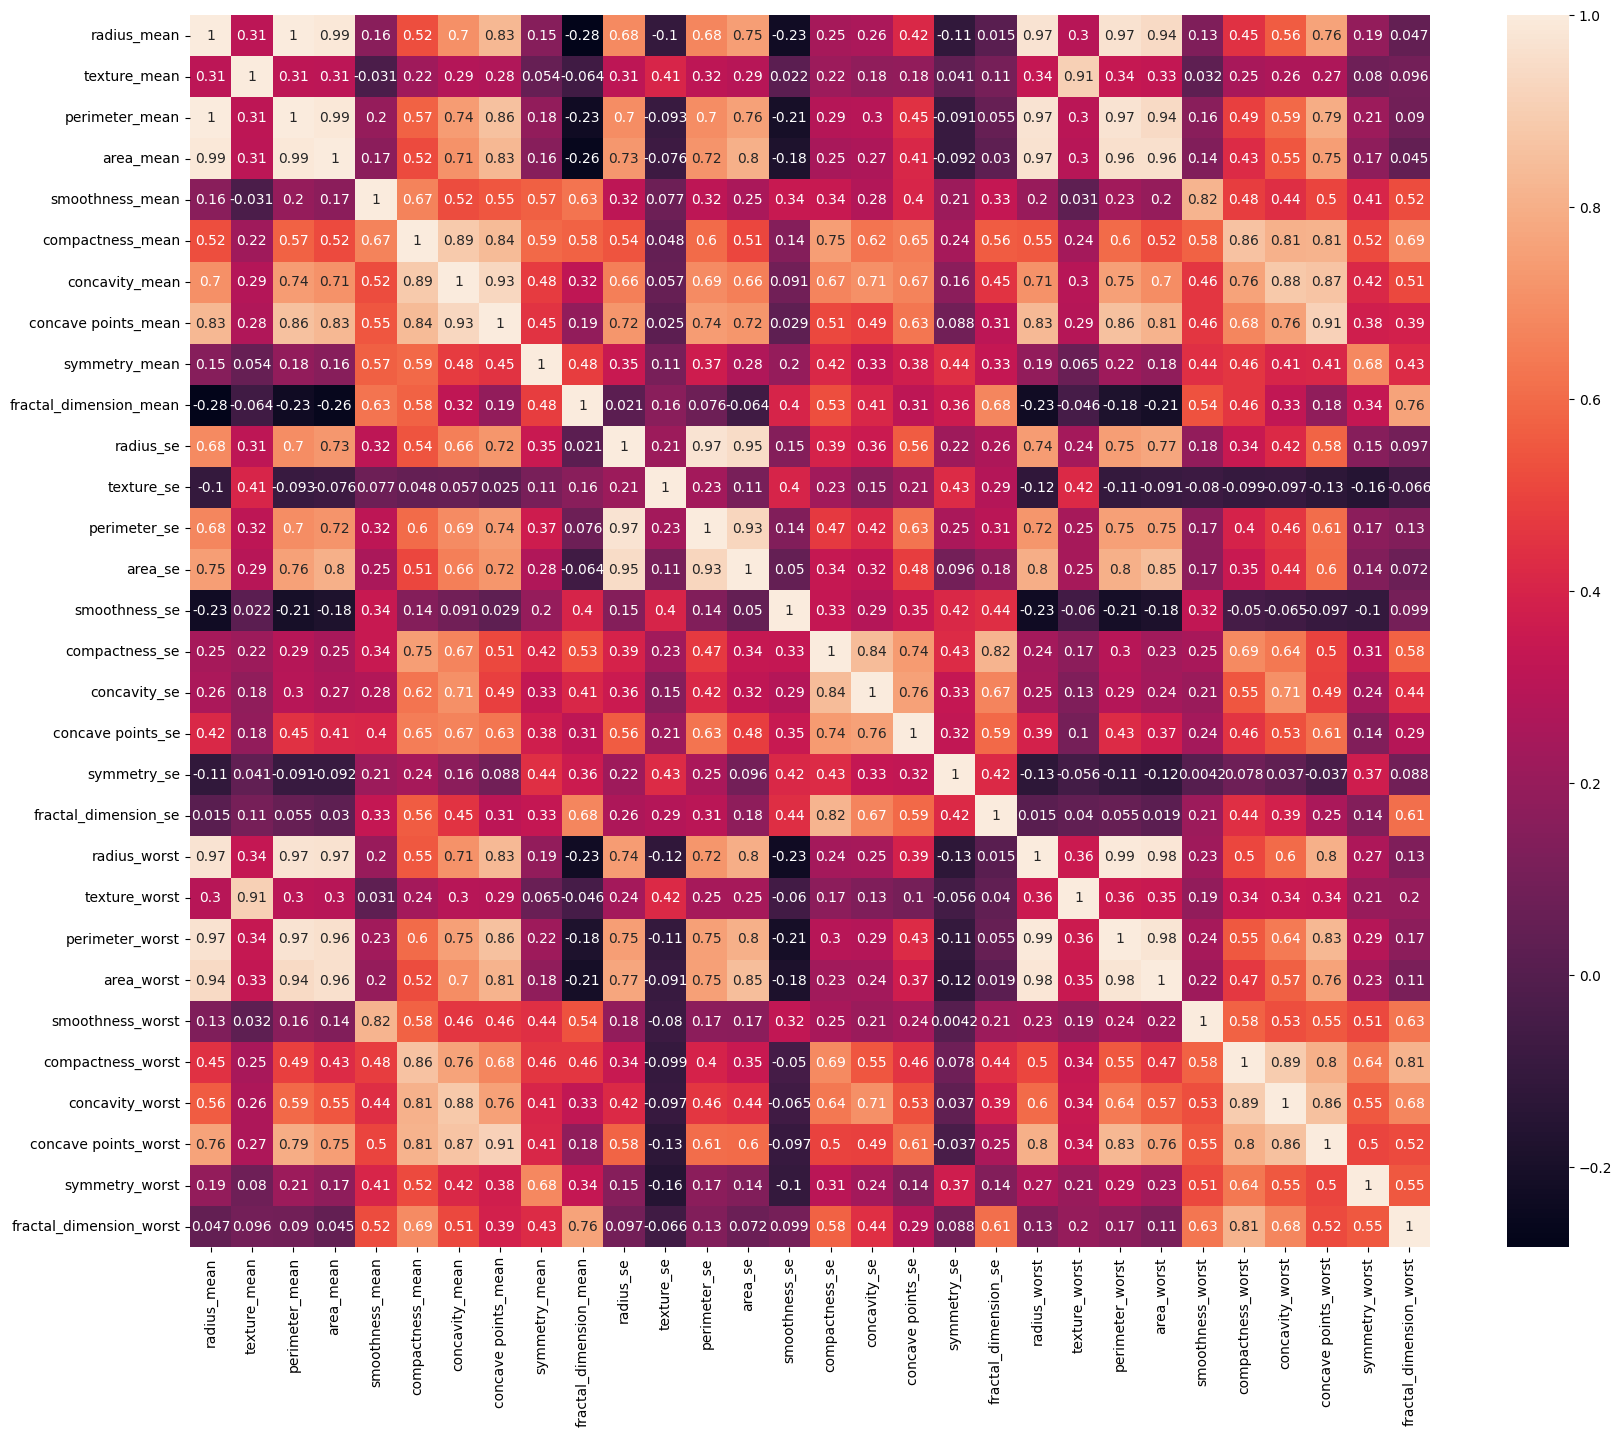

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))

corrMatrix = X_train.corr()
sn.heatmap(corrMatrix, annot=True)


plt.show()

مقدار جدول داده ترین را ابتدا خروجی می گیریم.

In [ ]:
X_train.shape

(455, 30)

برای تست نیز چنین کاری را انجام میدهیم.

In [ ]:
X_test.shape

(114, 30)

توجه کنید داده ها ۳۰ ستون دارد.

با استفاده از قطعه کد زیر اگر دو ویژگی دارای کورولیشین بالاتر از ۰.86 باشند، یکی از ویژگی ها حذف می شود. در ادامه داریم:

ابتدا ماتریسی بالا مثلثی تشکیل می دهیم. این ماتریس برای راحت تر کردن بررسی است.

دلیل بیان با ماتریس بالامثلثی این است که یک ویژگی نگه داشته می شود. به عبارتی اگر دو ویژگی دارای همبستگی بیشتر از ۰.۸۶ باشند، با استفاده از ساخت این ماتریس صرفا یکی از آن ها خذف خواهد شد.

In [ ]:
# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))


با استفاده از قطعه کد زیر محاسبه می کنیم که کدام موارد دارای همبستگی بیشتر از ۰.86 هستند.

به وضوح وجود یکی از آن ها برای ادامه مسئله ما کافی است.

In [ ]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.86)]

از این مقادیر خروجی میگیریم.

In [ ]:
to_drop

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

توچه کنید برای مقادیر منفی نیز این مقدار قابل بررسی است:

In [ ]:
# Find features with correlation greater than 0.95
to_drop_n = [column for column in upper.columns if any(upper[column] <- 0.86)]

In [ ]:
to_drop_n

[]

یکبار مقادیر آن ها را بررسی می کنیم.

In [ ]:
correlation_matrix[to_drop]

,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
radius_mean,0.997835,0.988596,0.704368,0.827230,0.677107,0.747906,0.970252,0.298148,0.966080,0.939990,0.445130,0.560481,0.764374
texture_mean,0.314673,0.312155,0.286327,0.277908,0.317119,0.293605,0.336227,0.907079,0.339222,0.331619,0.249680,0.263476,0.266357
perimeter_mean,1.000000,0.987617,0.742798,0.855366,0.698731,0.759026,0.970104,0.303254,0.971155,0.940294,0.485491,0.594817,0.789711
area_mean,0.987617,1.000000,0.710665,0.829363,0.717957,0.802097,0.967940,0.295863,0.964811,0.961844,0.427236,0.547341,0.747586
smoothness_mean,0.197197,0.165059,0.523779,0.545781,0.316052,0.254662,0.203882,0.030745,0.231028,0.196511,0.482524,0.438558,0.500662
compactness_mean,0.574187,0.518477,0.887934,0.836843,0.600320,0.507545,0.549850,0.240923,0.601903,0.522596,0.861402,0.806647,0.811997
concavity_mean,0.742798,0.710665,1.000000,0.931836,0.691081,0.655966,0.713601,0.295815,0.752609,0.696364,0.762974,0.883292,0.868404
concave points_mean,0.855366,0.829363,0.931836,1.000000,0.740676,0.723554,0.832868,0.289585,0.858028,0.809934,0.678059,0.758790,0.911413
symmetry_mean,0.183903,0.155713,0.476805,0.450008,0.367104,0.275126,0.186716,0.064529,0.219013,0.178943,0.461638,0.408026,0.409565
fractal_dimension_mean,-0.232505,-0.259416,0.323091,0.186344,0.075979,-0.063618,-0.227799,-0.046044,-0.179316,-0.210771,0.459896,0.326903,0.181863


با استفاده از قطعه کد زیر این ستون ها را از داده خود حذف می کنیم. توجه کنید دلیل ساخت ماتریس بالامثلثی

upper

به این دلیل بود که صرفا یکبار حذف شوند. یعنی مثلا اگر دو داده دارای همبستگی بالایی هستند صرفا وجود یکی از آن ها کافی است.

In [ ]:
# Drop features
X_train.drop(to_drop, axis=1, inplace=True)

از داده تست هم این مقادیر را حذف می کنیم.

In [ ]:
X_test.drop(to_drop, axis=1, inplace=True)

In [ ]:
X_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0.180901,0.342239,0.293220,0.075916,0.291414,0.283698,0.009403,0.159742,0.084543,0.027398,0.012660,0.099389,0.098328,0.063746,0.261705,0.195545,0.138331
1,0.188504,0.037538,0.371039,0.145605,0.306566,0.235257,0.012030,0.022211,0.147092,0.097921,0.049835,0.157946,0.078207,0.059694,0.552268,0.286024,0.198019
2,0.239698,0.180250,0.240408,0.044629,0.245455,0.159646,0.001560,0.069462,0.052759,0.020113,0.021373,0.091980,0.131114,0.021179,0.214819,0.263355,0.083891
3,0.256931,0.308759,0.398393,0.184467,0.353030,0.250000,0.045083,0.204385,0.132406,0.106708,0.050329,0.244425,0.157708,0.056371,0.387176,0.232407,0.113735
4,0.297481,0.141698,0.473684,0.306178,0.455556,0.275274,0.059700,0.030476,0.140667,0.156878,0.083739,0.204401,0.148281,0.092109,0.438685,0.295683,0.175325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.403923,0.456206,0.526045,0.895712,0.724747,0.654591,0.484705,0.462739,0.361934,0.433337,0.270968,0.739364,0.217932,0.234334,0.523212,0.337473,0.307359
451,0.235643,0.579980,0.458337,0.355561,0.445960,0.408804,0.120632,0.320191,0.251045,0.271863,0.123864,0.322983,0.153346,0.217489,0.708776,0.325251,0.429359
452,0.347154,0.602976,0.553128,0.429790,0.627778,0.438290,0.106138,0.148692,0.132372,0.301529,0.156057,0.266504,0.150391,0.208111,0.638117,0.522965,0.518562
453,0.710578,0.254988,0.372032,0.203178,0.331818,0.012216,0.449805,0.152670,0.131047,0.066603,0.068993,0.292665,0.066809,0.041347,0.430100,0.186280,0.064935


همانگونه که مشاهده می کنیم بعد از زدن دستور که ابعاد داده ها می دهد، ابعاد داده ها کاهش یافته است. که این ناشی از حذف ستون های با کورولیشن بالاست

In [ ]:
X_train.shape

(455, 17)

In [ ]:
X_test.shape

(114, 17)

In [ ]:
X_train

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0.180901,0.342239,0.293220,0.075916,0.291414,0.283698,0.009403,0.159742,0.084543,0.027398,0.012660,0.099389,0.098328,0.063746,0.261705,0.195545,0.138331
1,0.188504,0.037538,0.371039,0.145605,0.306566,0.235257,0.012030,0.022211,0.147092,0.097921,0.049835,0.157946,0.078207,0.059694,0.552268,0.286024,0.198019
2,0.239698,0.180250,0.240408,0.044629,0.245455,0.159646,0.001560,0.069462,0.052759,0.020113,0.021373,0.091980,0.131114,0.021179,0.214819,0.263355,0.083891
3,0.256931,0.308759,0.398393,0.184467,0.353030,0.250000,0.045083,0.204385,0.132406,0.106708,0.050329,0.244425,0.157708,0.056371,0.387176,0.232407,0.113735
4,0.297481,0.141698,0.473684,0.306178,0.455556,0.275274,0.059700,0.030476,0.140667,0.156878,0.083739,0.204401,0.148281,0.092109,0.438685,0.295683,0.175325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.403923,0.456206,0.526045,0.895712,0.724747,0.654591,0.484705,0.462739,0.361934,0.433337,0.270968,0.739364,0.217932,0.234334,0.523212,0.337473,0.307359
451,0.235643,0.579980,0.458337,0.355561,0.445960,0.408804,0.120632,0.320191,0.251045,0.271863,0.123864,0.322983,0.153346,0.217489,0.708776,0.325251,0.429359
452,0.347154,0.602976,0.553128,0.429790,0.627778,0.438290,0.106138,0.148692,0.132372,0.301529,0.156057,0.266504,0.150391,0.208111,0.638117,0.522965,0.518562
453,0.710578,0.254988,0.372032,0.203178,0.331818,0.012216,0.449805,0.152670,0.131047,0.066603,0.068993,0.292665,0.066809,0.041347,0.430100,0.186280,0.064935


In [ ]:
X_test

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0.258839,0.210433,0.979355,0.550571,0.608868,0.582382,0.079787,0.204717,0.300144,0.298551,0.092727,0.215382,0.252585,0.141480,0.908512,0.566408,0.740761
1,0.319419,0.515915,0.745911,0.799647,0.596956,0.599504,0.035417,0.329717,0.222150,0.589763,0.138914,0.308392,0.208555,0.245891,0.769292,0.472128,0.941082
2,0.433007,0.430592,0.807845,0.685820,0.659828,0.518610,0.164866,0.286675,0.265224,0.203691,0.080505,0.245690,0.149850,0.108884,0.906523,0.498788,0.631494
3,0.288655,0.210875,0.656980,0.369960,0.529451,0.383375,0.025665,0.140827,0.053896,0.135918,0.042879,0.122940,0.147476,0.049345,0.432180,0.372273,0.284735
4,0.395617,0.146773,0.653803,0.733283,0.896095,0.438213,0.117596,0.123745,0.248124,0.521428,0.162778,0.426596,0.577839,0.117623,0.509745,0.731701,0.473594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.642198,0.438550,0.610926,0.566952,0.635341,0.244417,0.211774,0.249507,0.088600,0.216616,0.101136,0.269180,0.205750,0.058499,0.388425,0.346340,0.218961
110,0.155190,0.249337,0.359536,0.175319,0.332230,0.359305,0.000000,0.264258,0.499278,0.269217,0.065985,0.207805,0.276757,0.169499,0.580350,0.252787,0.423567
111,0.389938,0.870027,0.614102,0.713122,0.636003,0.467990,0.052853,0.345857,0.091991,0.467029,0.185833,0.304603,0.246541,0.178237,0.536595,0.591614,0.917515
112,0.455251,0.757737,0.292520,0.266213,0.279947,0.094789,0.123976,0.287572,0.184199,0.341935,0.119444,0.294942,0.069777,0.100215,0.260143,0.138148,0.245849


In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
#from tensorflow import set_random_seed


In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random
from sklearn import metrics

برای ثابت نگه داشتن مقادیر دستور زیر را فراخوانی می کنیم.
منظور ثابت نگه داشتن در هر بار اجرا است.

In [ ]:
SEED_VALUE = 0
#tf.keras.utils.set_random_seed(SEED_VALUE)
#tf.config.experimental.enable_op_determinism()
tf.random.set_seed(SEED_VALUE)

با توجه به اینکه تابع فعال ساز استپ فانکشن نیاز است. این تابع را می سازیم.

In [ ]:
def step_func(x):
  if(x>0.5):
    return 1
  return 0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


تعداد فیچر ورودی را خروجی میگیریم

In [ ]:
input_shape =input_shape=[X_train.shape[1]]
input_shape

[17]

با استفاده از مدل

Sequential

مدل خود را می سازیم.

تعداد لایه های به شکل زیر است.

ابتدا لایه ای جهت ورودی ها که برابر با تعداد فیچر هاست و ۱۷ تا نورون دارد و سپس لایه پنهانی به تعداد نورون ۲۰ اولین لایه پنهان است. نام آن را لایه اول می نامیم و همچنین تابع فعالساز سیگوید را انتخاب میکنیم.

برای لایه نهان دوم که دارای ۱۰ نورون است و همچنین دارای تابع فعال ساز سیگموید است را انتخاب می کنیم.

برای لایه نهان سوم که دارای ۵ نورون است نیز همین موارد قبلی را داریم.

یعنی این شبکه دارای ۳ لایه پنهان است و از طرفی برای لایه آخر یا بع عبارتی لایه خروحی داریم که تک نورون است. با توچه به اینکه
مدل انتخاب کلاس است پس از تابع فعال ساز سیگموید استفاده می کنیم.

به عبارتی صفر خروجی شبکه دارای سرطان خوش خیم است و ۱ داری سرطان بدخیم است.

همچنین توجه کنید لایه ورودی برابر با مقدار
فیچر ها بعد از حذف شدن خواهد بود که این جا مقدار ۱۷ را دارد.

به وضوح دارای ۳ لایه پنهان است.

پس نتیجه برابر شد با ۱ لایه ورودی یا ۱۷ تا نورون

سه لایه پنهان با تابع فعال ساز سیگموید و نورون های به ترتیب ۲۰  و ۱۰ و ۵ و در لایه آخر لایه خروجی با تابع فعال سازی سیگموید دارای ۱ نورون هستیم.

دلیل استفاده از سیگمید عدم مشتق پذیری ضابطه استپ فانکشن است. حال آنکه سیگموید مشتق پذیر است و در مرحله آخر برای خروجی نتیجه از تابع استپ فانکش استفاده کرده و مقادیر کمتر از ۰.۵ را صفر و مقادیر بزرگ تر از ۰.۵ را ۱ در نظر میگیریم

In [ ]:

model = Sequential(
    [
        tf.keras.Input(input_shape[0]),
        layers.Dense(20,activation= "sigmoid", name="layer1"),
        #(Dropout(0.5))
        layers.Dense(10, activation= "sigmoid", name="layer2"),
        layers.Dense(5, activation= "sigmoid", name="layer3"),
        layers.Dense(1, activation= "sigmoid",name="layer4"),
    ]
)


In [ ]:
model.layers


خلاصه لایه ها یه همراه نورون ها در زیر مشهود است.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 20)                360       
                                                                 
 layer2 (Dense)              (None, 10)                210       
                                                                 
 layer3 (Dense)              (None, 5)                 55        
                                                                 
 layer4 (Dense)              (None, 1)                 6         
                                                                 
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


مدل را با استفاده از خطای کمترین مربعات و با استفاده از معیار

accuracy

پیش رفته و همچنین معیار را بر مبنای
کمترین مربعات قرار می دهیم.

اپتیمازر را
آدام
انتخاب می کنیم.
 در روش بهینه سازی آدام ، هر یک از نرخ‌های یادگیری برای پارامترهای مختلف از گشتاورهای اول و دوم گرادیان‌ها محاسبه می‌شوند.

مقدار

learning rate

را برابر با ۰.۰۰۱
قرار می دهیمم.

مقدار ۰.۰۰۱ را برحسب تجربه و اندکی جست و جو برای مقدار مناسب پیدا کرده ایم.

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])

The **batch size** is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

**Epochs** are defined as the total number of iterations for training the machine learning model with all the training data in one cycle. In Epoch, all training data is used exactly once. Further, in other words, Epoch can also be understood as the total number of passes an algorithm has completed around the training dataset. A forward and a backward pass together counted as one pass in training.

Batch size به تعداد داده هایی اشاره دارد که در هر مرحله از آموزش شبکه به آن داده ها می دهیم. به عبارت دیگر، برای آموزش یک شبکه، داده ها را به چندین بخش تقسیم می کنیم و در هر بخش، تعداد خاصی از داده ها را به شبکه می دهیم.

Epoch به تعداد بارهایی اشاره دارد که شبکه روی کل مجموعه دادگان آموزش قرار می گیرد. به عبارت ساده، چندین بار شبکه روی تمام دادگان آموزش قرار می گیرد و در هر بار، batch size تعداد خاصی از دادگان را در نظر می گیرد.


پس استفاده مقدار درستی از

batch size


استفاده کرده ایم

در ادامه با قرار دادن مقدار

epochs

برابر با ۵۰ و همچنین با قرار دادن مقدار

batch size

برابر با ۲۰ و

validation slit

۰.۲

برای جلوگیری از فیت شدن داده داریم.

validation split

همانگونه که در درس داشتیم بخشی از داده های آموزشی که به عنوان داده های اعتبار سنجی استفاده می شود. مدل این کسری از داده‌های آموزشی را جدا می‌کند، روی آن آموزش نمی‌دهد، و در پایان هر دوره از دست دادن و هر معیار مدل روی این داده‌ها را ارزیابی می‌کند.

با استفاده از مقدار ۰.۲ به دسته بندی مناسبی داریم و از اورفیت شدن جلوگیری می کنیم.

In [ ]:
model.fit(X_train,y_train, epochs=50, batch_size=20, validation_split=0.2)

Epoch 1/50
19/19 [==============================] - 2s 37ms/step - loss: 0.2348 - accuracy: 0.6319 - val_loss: 0.2323 - val_accuracy: 0.6374
Epoch 2/50
19/19 [==============================] - 0s 11ms/step - loss: 0.2333 - accuracy: 0.6319 - val_loss: 0.2317 - val_accuracy: 0.6374
Epoch 3/50
19/19 [==============================] - 0s 9ms/step - loss: 0.2329 - accuracy: 0.6319 - val_loss: 0.2313 - val_accuracy: 0.6374
Epoch 4/50
19/19 [==============================] - 0s 13ms/step - loss: 0.2325 - accuracy: 0.6319 - val_loss: 0.2308 - val_accuracy: 0.6374
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.2322 - accuracy: 0.6319 - val_loss: 0.2305 - val_accuracy: 0.6374
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 0.2320 - accuracy: 0.6319 - val_loss: 0.2303 - val_accuracy: 0.6374
Epoch 7/50
19/19 [==============================] - 0s 10ms/step - loss: 0.2316 - accuracy: 0.6319 - val_loss: 0.2300 - val_accuracy: 0.6374
Epoch 8/50
19/1

خط زیر را یادداشت می کنیم ای خط به پیش بینی داده خروجی ما از مجموعه داده تست بر مبنای مدل داده شده می پردازد. همچنین با استفاده از خط دوم می توانیم داده ها را دسته بندی کنیم

In [ ]:
y_predict = model.predict(X_test)
y_predict =  (y_predict > 0.5)

4/4 [==============================] - 0s 9ms/step


با دستور زیر مقدار

precision

recall

f1_score

accuracy

را می یابیم.

توجه کنید به دوقسممت ۰ و ۱ این مقادیر تقسیم شده اند که بر مبنای این است که سه ضابطه اولی که معرفی کردیم را یکبار بر اساس ۰ و یکبار بر اساس ۱ مورد بررسی قرار می دهد

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94        69
         1.0       0.97      0.82      0.89        45

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93        69
         1.0       0.97      0.80      0.88        45

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114

در

accuracy

به مقدار

بالای ۹۰ درصد رسیدیم که مقدار مناسب و بالای است.

اما مهم تر از بررسی دقت، بررسی ریکال این داده هاست چرا که این داده ها بررسی سرطان خوش خیم و بدخبم می باشند، به وضوح اینکه سرطانی بدخیم باشد و تشخیض داده شود بسیار پر اهمیت است. بدخیمی را با ام بزرگ نمایش دادیم که در عددی کردن به ۱ تبدیل شد یعنی این جا هدف ما بیشتر شدن مقدار ریکال نیز می باشند، هرچند دقت نیز برای ما پر اهمیت است. از طرفی در این داده مقدار اف ۱ برابر با ۰.۸۸ به ازای ۱ و ۰.۹۳ به ازایی ۰ می باشد که هر دو اعداد بالا و خوبی هستدو مقادیر ریکال نیز به ازای صفر ۰.۹۹ و به ازای یک ۰.۸می یاشد. از طرفی برای پریسیژن نیز به ازای صفر مقدار ۰.۸۸ و بع ازای یک مقدار ۰.۹۷ مشهود است. در کل مدل مناسبی است.


[[68  1]
 [ 8 37]]


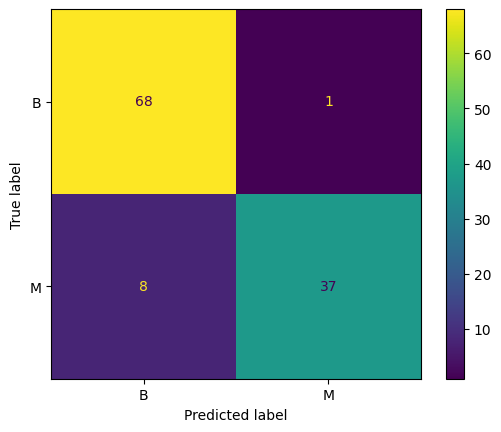

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix , display_labels = ['B', 'M'])
print(confusion_matrix)
cm_display.plot()
plt.show()

# تحلیل ماتریس آشفتگی
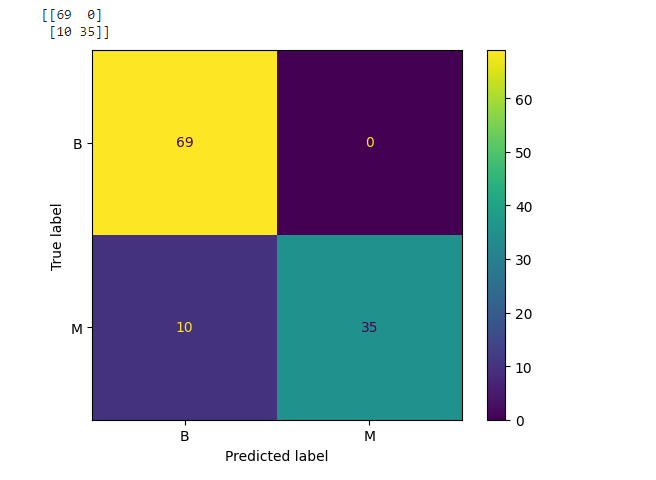

نکته در اینجا صفر نشان دهنده خوش خیم است و

 یک نشان دهنده بدخیم است

درایه سطر اول سمت چپ  تعداد داده های خوش خیم است که خوش خیم پیش بینی شده اند که برابر 69 است

درایه سطر اول سمت چپ تعداد داده هایست که خوش خیم بودند و بد خیم پیشبینی شده اند برابر 0 می باشد

درایه سطر دوم سمت چپ تعداد داده هایست که بد خیم بودند و خوش خیم پیشبینی شده اند و برابر 10 است

و درایه سطر دوم سمت راست نشان دهنده تعداد داده هایست که بدخیم بوده و بدخیم پیشبینی شده اند و برابر 35 می باشد

همواره سعی بر این است که مقدار اعداد رو قطراصلی ماتریس ینی پیشبینی های درست را افزایش دهیم


برای مابقی ماتریس های اشفتگی در این کد تویضیح به همین  شکل میباشد و فقط اعداد تغییر می کنند

# نوشتن مدل ها

چهار مدل یکسان با استفاده از ۳ لایه نهان که به ترتیب با تعداد لایه های نهان ۳ و درلایه اول نهان ۲۰ نورون، در لایه دوم نهان ۵ نورون و در لایه سوم نهان ۲ نورون و در لایه آخر برای دیدن نتیجه با ۱ نورون داریم.

جز در لایه آخر که به دلیل مقادیر از
کلاس از سیگموید
استفاده می کنیم. در لایه های دیگر از تابع فعال ساز
تانژانت هایپربولیک استفاده می کنیم که دلیل استفاده از این تابع فعال ساز این است که در آزمون و خطای خود به دقت بالاتری رسیدیم.

پس به طور کلی دارای لایه ورودی با ۱۷ نورون و لایه پنهان اولی با ۲۰ نورون و دومی با ۵ نورون و سومی با دو نورون و همگی لایه های نهان دارای تابع فعال ساز تاژانت
هایپربولیک هستند. از طرفی لایه اخر که همان لایه خروجی
نیز دارای تابع فعال سازی سیگموید با یک نورون است. لایه اخر لایه خروجی است.

دلیل استفاده از سیگمید عدم مشتق پذیری ضابطه استپ فانکشن است. حال آنکه سیگموید مشتق پذیر است و در مرحله آخر برای خروجی نتیجه از تابع اتپ فانکش استفاده کرده و مقادیر کمتر از ۰.۵ را صفر و مقادیر بزرگ تر از ۰.۵ را ۱ در نظر میگیریم

In [ ]:
model_1= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='tanh'),
#dense layer 2
Dense(5, activation='tanh'),
# dense layer 2
Dense(2, activation='tanh'),
# output layer
Dense(1,activation="sigmoid"),
])

In [ ]:
model_2= Sequential([
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='tanh'),
#dence layer 2
Dense(5, activation='tanh'),
# dense layer 3
Dense(2, activation='tanh'),
# output layer
Dense(1, activation="sigmoid"),
])


In [ ]:
model_3= Sequential([
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='tanh'),
#dence layer 2
Dense(5, activation='tanh'),
# dense layer 3
Dense(2, activation='tanh'),
# output layer
Dense(1, activation="sigmoid"),
])

In [ ]:
model_4= Sequential([
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='tanh'),
#dense layer 2
Dense(5, activation='tanh'),
# dense layer 2
Dense(2, activation='tanh'),
# output layer
Dense(1, activation="sigmoid"),
])


##کامپایل کردن مدل

مدل های خود را بر مبنای

acuuracy

و

mse = Mean Squared Error (MSE)

که معیار کمترین مربعات است خروجی می دهیم.

حال در مرحله بعد با توجه به فاییل گزارش دو مدل را برحسب

ADAM
و mse و

برحسب معیار دقت قرار می دهیم.ما دو مقدار ۲ و ۳۰ را به عنوان دوره انتخاب میکنیم و دو مقدار ۰.۰۰۱ و ۱ را به عنوان نرخ یادگیری انتخاب می کنیم و مدل ها را برحسب آن اموزش می دهیم.

In [ ]:
model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1), loss='mse',metrics=['accuracy'])
model_3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1), loss='mse',metrics=['accuracy'])
model_4.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])

#مدل1

در این مدل مقدار
دوره
رابرابر با ۲ قرار می دهیم.

نرخ یادگیری برابر با ۰.۰۰۱ است.

In [ ]:
model_1.fit(X_train, y_train, epochs=2, batch_size=20, validation_split=0.2)

Epoch 1/2
19/19 [==============================] - 2s 34ms/step - loss: 0.2792 - accuracy: 0.3819 - val_loss: 0.2452 - val_accuracy: 0.5714
Epoch 2/2
19/19 [==============================] - 0s 14ms/step - loss: 0.2417 - accuracy: 0.5962 - val_loss: 0.2251 - val_accuracy: 0.6923


Epoch 1/2
19/19 [==============================] - 1s 14ms/step - loss: 0.2196 - accuracy: 0.6319 - val_loss: 0.2152 - val_accuracy: 0.6484
Epoch 2/2
19/19 [==============================] - 0s 5ms/step - loss: 0.2031 - accuracy: 0.6978 - val_loss: 0.1989 - val_accuracy: 0.7473
<keras.callbacks.History at 0x7fc08b2b14b0>

# دقت

#Presicion ,recall, f1-score

مانند قبل به پردیکت می پردازیم.

In [ ]:
y_predict_1 = model_1.predict(X_test)
y_predict_1 =  (y_predict_1 > 0.5)

4/4 [==============================] - 0s 4ms/step


In [ ]:
print(classification_report(y_test, y_predict_1))

              precision    recall  f1-score   support

         0.0       0.61      0.80      0.69        69
         1.0       0.42      0.22      0.29        45

    accuracy                           0.57       114
   macro avg       0.51      0.51      0.49       114
weighted avg       0.53      0.57      0.53       114



              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79        69
         1.0       0.81      0.29      0.43        45

    accuracy                           0.69       114
   macro avg       0.74      0.62      0.61       114
weighted avg       0.73      0.69      0.65       114

با قرار دهی مقادیر قبل
با توجه به خروجی ها به مقدار
 پایینی به ازای داده ۱ رسیدیم. توجه کنید داده ۱ مربوط داده های بدخیم است. یعنی برای ما مهم است که مقدار

 recall

 بالاتری برای این دسته داده داشته باشیم. از طرفی مقدار

accuracy

نیز آنچنان بالا نیست.

به ازای داده ۱ ریکال مقدار بسیار پایینی دارد و از طرفی دقت حدود 69 درصد است. مقار اف ۱ به ازای سرطان بدخیم  پایین است. از طرفی مقدار ریکال به ازای داده خوش خیم بالا است ولی همانگونه که بیان شد، این جا برای ما داده بد خیم اهمیت بیشتری دارد.

#confusion-matrix

[[55 14]
 [35 10]]


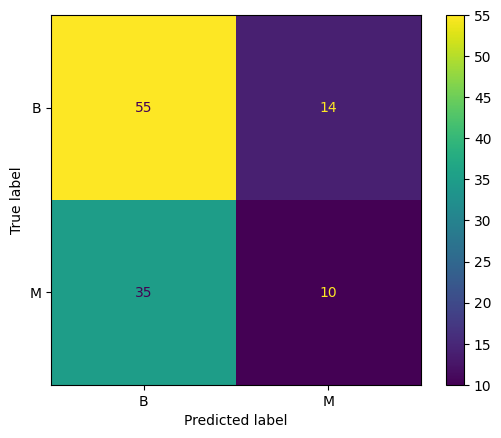

In [ ]:
confusion_matrix_1 = metrics.confusion_matrix(y_test,y_predict_1 )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1 , display_labels = ['B', 'M'])
print(confusion_matrix_1)
cm_display.plot()
plt.show()

# تحلیل ماتریس آشفتگی

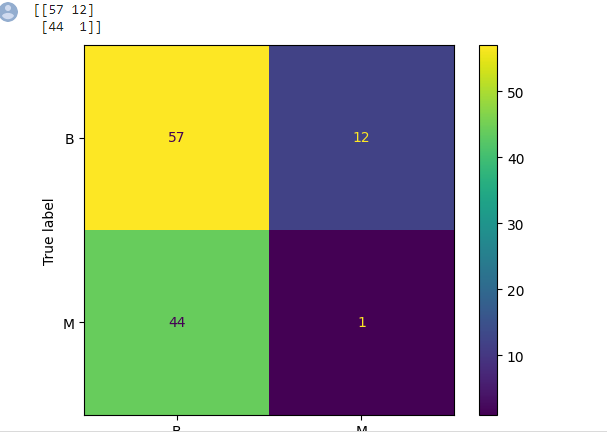

نکته در اینجا صفر نشان دهنده خوش خیم است و

 یک نشان دهنده بدخیم است

درایه سطر اول سمت چپ  تعداد داده های خوش خیم است که خوش خیم پیش بینی شده اند که برابر 57 است

درایه سطر اول سمت چپ تعداد داده هایست که خوش خیم بودند و بد خیم پیشبینی شده اند برابر 12 می باشد

درایه سطر دوم سمت چپ تعداد داده هایست که بد خیم بودند و خوش خیم پیشبینی شده اند و برابر 44 است

و درایه سطر دوم سمت راست نشان دهنده تعداد داده هایست که بدخیم بوده و بدخیم پیشبینی شده اند و برابر 1 می باشد

همواره سعی بر این است که مقدار اعداد رو قطراصلی ماتریس ینی پیشبینی های درست را افزایش دهیم


برای مابقی ماتریس های اشفتگی در این کد تویضیح به همین  شکل میباشد و فقط اعداد تغییر می کنند

با توجه به مقدار درایه دوم ستون دوم این مدل اصلا مناسب نمی باشد از طرفی مقدار ستون اول ردیف دوم نیز بسیار بالاست.

##مدل 2

در این مدل نرخ یادگیری برابر با ۱ و دوره برابر با ۳۰ می باشد.

In [ ]:
model_2.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)

Epoch 1/30
19/19 [==============================] - 1s 13ms/step - loss: 0.3165 - accuracy: 0.6154 - val_loss: 0.2419 - val_accuracy: 0.6374
Epoch 2/30
19/19 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.5440 - val_loss: 0.2314 - val_accuracy: 0.6374
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2810 - accuracy: 0.6099 - val_loss: 0.2311 - val_accuracy: 0.6374
Epoch 4/30
19/19 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.6044 - val_loss: 0.2449 - val_accuracy: 0.6374
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2494 - accuracy: 0.5824 - val_loss: 0.2383 - val_accuracy: 0.6374
Epoch 6/30
19/19 [==============================] - 0s 5ms/step - loss: 0.2501 - accuracy: 0.5769 - val_loss: 0.2679 - val_accuracy: 0.6374
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2473 - accuracy: 0.6099 - val_loss: 0.2333 - val_accuracy: 0.6374
Epoch 8/30
19/19 [=

#دقت

In [ ]:
y_predict_2 = model_2.predict(X_test)
y_predict_2 = y_predict_2 > 0.5

4/4 [==============================] - 0s 4ms/step


#Presicion ,recall, f1-score

In [ ]:
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

با توجه به مقادیر به دست آمده مدل ما اصلا مطلوب نیست هرچند ما مقدار دوره را افزایش داده ولی همچنان به دلیل نرخ بالای یادگیری به مقدار نامناسبی می رسیم.


توجه کنید البته در بخش کلی دقیق تر بررسی کردم ولی این جا به دلیل مقدار بالای نرخ یادگیری مدل در یک بهینه محلی و نادرست می افتد.

#confusion-matrix

[[69  0]
 [45  0]]


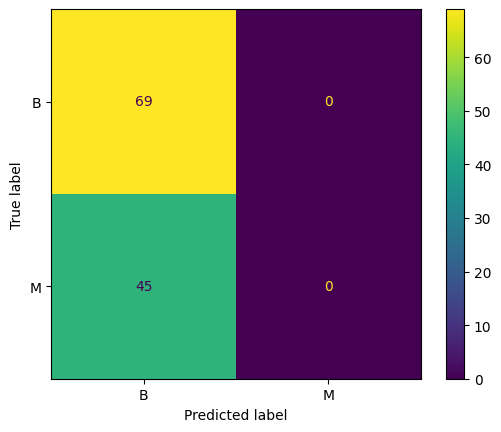

In [ ]:
confusion_matrix_2 = metrics.confusion_matrix(y_test,y_predict_2 )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2 , display_labels = ['B', 'M'])
print(confusion_matrix_2)
cm_display.plot()
plt.show()

# تحلیل ماتریس آشفتگی

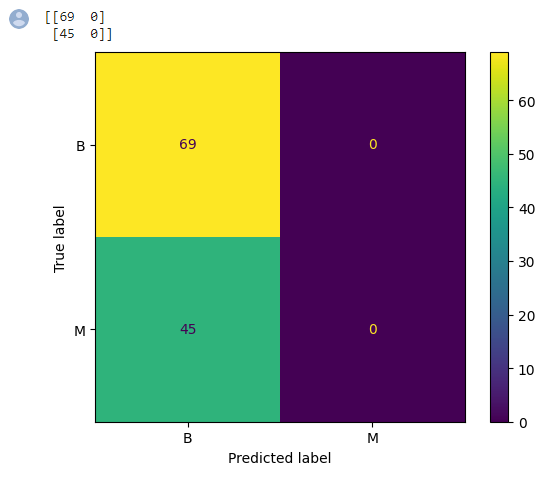

نکته در اینجا صفر نشان دهنده خوش خیم است و

 یک نشان دهنده بدخیم است

درایه سطر اول سمت چپ  تعداد داده های خوش خیم است که خوش خیم پیش بینی شده اند که برابر 69 است

درایه سطر اول سمت چپ تعداد داده هایست که خوش خیم بودند و بد خیم پیشبینی شده اند برابر 0 می باشد

درایه سطر دوم سمت چپ تعداد داده هایست که بد خیم بودند و خوش خیم پیشبینی شده اند و برابر 45 است

و درایه سطر دوم سمت راست نشان دهنده تعداد داده هایست که بدخیم بوده و بدخیم پیشبینی شده اند و برابر0 می باشد

همواره سعی بر این است که مقدار اعداد رو قطراصلی ماتریس ینی پیشبینی های درست را افزایش دهیم


برای مابقی ماتریس های اشفتگی در این کد تویضیح به همین  شکل میباشد و فقط اعداد تغییر می کنند

با توجه به صفر شدن درایه دوم ستون دوم به وضوح مدل مناسبی نمی باشد

از طرفی مقدار ستون اول ردیف دوم نیز بسیار بالا می باشد.

#مدل3

در این مدل با نرخ یادگیری برابر با ۱ و دوره ۲ به بررسی می پردازیم.

In [ ]:
model_3.fit(X_train, y_train, epochs=2, batch_size=20, validation_split=0.2)


Epoch 1/2
19/19 [==============================] - 2s 19ms/step - loss: 0.2559 - accuracy: 0.5604 - val_loss: 0.2455 - val_accuracy: 0.6374
Epoch 2/2
19/19 [==============================] - 0s 6ms/step - loss: 0.2576 - accuracy: 0.5714 - val_loss: 0.2487 - val_accuracy: 0.6374


#دقت

In [ ]:
y_predict_3  = model_3.predict(test, batch_size=20, verbose=1)
y_predict_3 = y_predict_3 > 0.5

6/6 [==============================] - 0s 2ms/step


#Presicion ,recall, f1-score

In [ ]:
print(classification_report(y_test,y_predict_3))

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

در این مورد به دقت پایینی رسیدم که به هیچ وجه مطلوب نیست. از طرفی با توجه به اینکه داده سرطان بود بیان کردیم مقدار ریکال ۱ برای ما پر اهمیت تر است ولی متاسفانه مقدار ۰ برای این مورد گزارش شده است که بسیار نادرست و ناشی از نادرست کار کردن الگوریتم ما دارد.

توجه کنید در این جا با توجه به اینکه دوره مقدار بالایی دارد ولی با وجود رخ بالای یادگیری همچنان ما به مقدار نامناسب گرفتار شدیم و مدل مانند مدل دوم رفتار می کند. یعنی تاثیر بزرگ بودن نرخ یادگیری بسیار بیشتر از بزرگ بودن دوره است.

با توجه به صفر شدن مقدار ریکال به وضوح مدل ما بی فایده است.

#confusion-matrix

[[69  0]
 [45  0]]


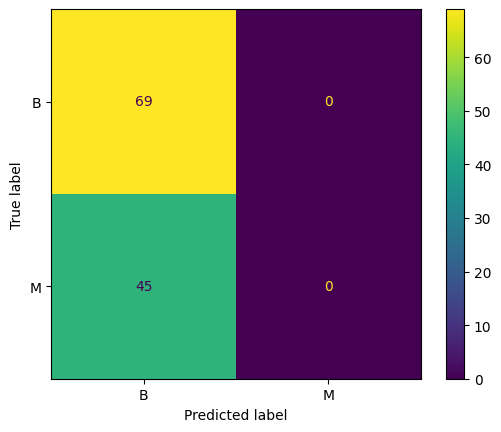

In [ ]:
confusion_matrix_3 = metrics.confusion_matrix(y_test,y_predict_3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_3 , display_labels = ['B', 'M'])
print(confusion_matrix_3)
cm_display.plot()
plt.show()

# تحلیل ماتریس آشفتگی
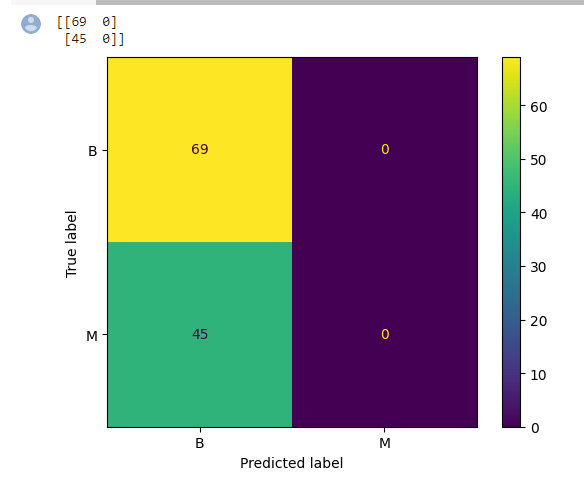

نکته در اینجا صفر نشان دهنده خوش خیم است و

 یک نشان دهنده بدخیم است

درایه سطر اول سمت چپ  تعداد داده های خوش خیم است که خوش خیم پیش بینی شده اند که برابر 69 است

درایه سطر اول سمت چپ تعداد داده هایست که خوش خیم بودند و بد خیم پیشبینی شده اند برابر 0 می باشد

درایه سطر دوم سمت چپ تعداد داده هایست که بد خیم بودند و خوش خیم پیشبینی شده اند و برابر 45 است

و درایه سطر دوم سمت راست نشان دهنده تعداد داده هایست که بدخیم بوده و بدخیم پیشبینی شده اند و برابر 0 می باشد

همواره سعی بر این است که مقدار اعداد رو قطراصلی ماتریس ینی پیشبینی های درست را افزایش دهیم


برای مابقی ماتریس های اشفتگی در این کد تویضیح به همین  شکل میباشد و فقط اعداد تغییر می کنند

با توجه به صفر شدن درایه دوم ستون دوم به وضوح مدل مناسبی نمی باشد

این ماتریس مانند قبل است و ستون اول ردیف دوم نیز بسیار مقدار زیاد و نامناسبی نسبت به داده ها دارد.

#مدل4

در این مدل با نرخ ۰.۰۰۱ و دوره ۳۰ به بررسی می پردازیم.

In [ ]:
model_4.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)

Epoch 1/30
19/19 [==============================] - 1s 13ms/step - loss: 0.2285 - accuracy: 0.6951 - val_loss: 0.2188 - val_accuracy: 0.6813
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.7033 - val_loss: 0.2069 - val_accuracy: 0.7582
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2000 - accuracy: 0.8187 - val_loss: 0.1939 - val_accuracy: 0.8242
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1854 - accuracy: 0.8269 - val_loss: 0.1795 - val_accuracy: 0.8352
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.8681 - val_loss: 0.1655 - val_accuracy: 0.8571
Epoch 6/30
19/19 [==============================] - 0s 5ms/step - loss: 0.1553 - accuracy: 0.8956 - val_loss: 0.1509 - val_accuracy: 0.9011
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1405 - accuracy: 0.8956 - val_loss: 0.1388 - val_accuracy: 0.9231
Epoch 8/30
19/19 [=

#دقت

In [ ]:
y_predict_4 = model_4.predict(X_test, batch_size=20, verbose=1)
y_predict_4 = y_predict_4> 0.5

6/6 [==============================] - 0s 2ms/step


#Presicion ,recall, f1-score

In [ ]:
print(classification_report(y_test,y_predict_4))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        69
         1.0       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




print(classification_report(y_test,y_predict_4))
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        69
         1.0       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

با اخذ مقدار متفاوت و کوچک لرنینگ ریت همانگونه که مشهود است به مقدار مناسبی هم از جهت دقت و هم از جهت ریکال  رسیدیم. به وضوح این مقدار نرخ یادگیری یکی بهترین گزینه برای ما می باشد

#confusion-matrix

[[67  2]
 [ 3 42]]


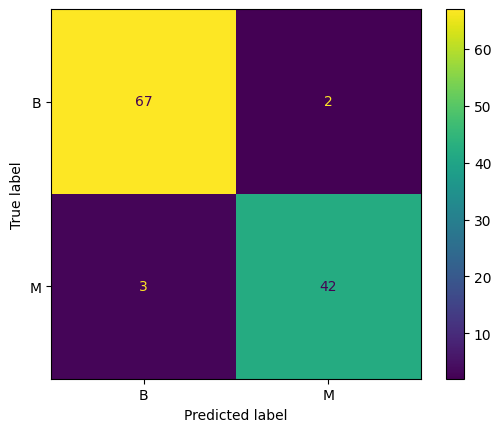

In [ ]:
confusion_matrix_4 = metrics.confusion_matrix(y_test,y_predict_4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_4 , display_labels = ['B', 'M'])
print(confusion_matrix_4)
cm_display.plot()
plt.show()


# تحلیل ماتریس آشفتگی
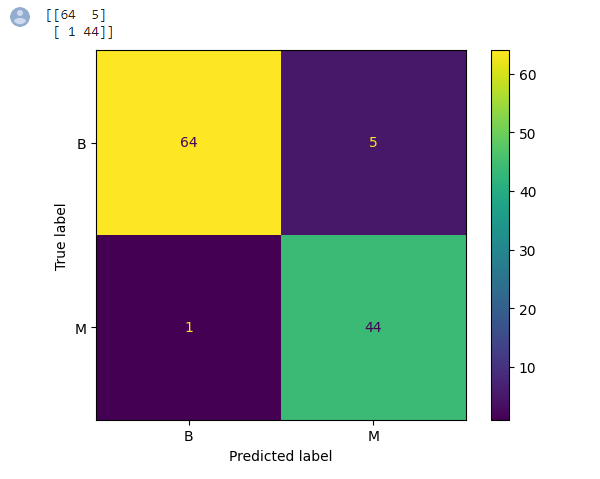
نکته در اینجا صفر نشان دهنده خوش خیم است و

 یک نشان دهنده بدخیم است

درایه سطر اول سمت چپ  تعداد داده های خوش خیم است که خوش خیم پیش بینی شده اند که برابر 64 است

درایه سطر اول سمت چپ تعداد داده هایست که خوش خیم بودند و بد خیم پیشبینی شده اند برابر 5 می باشد

درایه سطر دوم سمت چپ تعداد داده هایست که بد خیم بودند و خوش خیم پیشبینی شده اند و برابر 1 است

و درایه سطر دوم سمت راست نشان دهنده تعداد داده هایست که بدخیم بوده و بدخیم پیشبینی شده اند و برابر 44 می باشد

همواره سعی بر این است که مقدار اعداد رو قطراصلی ماتریس ینی پیشبینی های درست را افزایش دهیم


برای مابقی ماتریس های اشفتگی در این کد تویضیح به همین  شکل میباشد و فقط اعداد تغییر می کنند

این با با توجه به اینکه درایه اول ستون اول و درایه دوم ستون دوم مقادیر بزرگی
دارند مدل بسیار بهتری نسبت به مدل ۲ و ۳ است. از طرفی در مقایسه با مدل ۱ نیز با توجه به درایه های آن که به شرح زیر است، به مدل بسیار بهتری رسیدیم.

ماتریس آشفتگی به ازای مدل اول

[[57 12]
 [44  1]]



توجه شود به ازای ماتریس کورولیشن هدف ماکسیمم کردن درایه اول ستون اول و درایه دوم ستون دوم و مینیمم کردن بقیه درایه هاست.


# مقایسه مدل ها

در بالا برحسب ماتریس آشفتگی مقایسه کردیم می دانیم یکی از بهترین معیار های ما برای ارزیابی میزا دقت میباشد از طرفی هماظور که ذکر شد با توجه به نوع داده ها ریکال داده بدخیم برای ما اهمیت دو چندان دارد. می دانیم در حالت کلی هذف بررسی اف ۱ و دقت و باقی مقادیر است  ولی در این جا بررسی مقدار ریکال داده بدخیم و دقت مهم است.چرا که برای ما مهم است حداکثر سرطان بدخیم را شناسایی کنیم تا برای درمان آن ها چاره اندیشی شود.

مدل اول

نرخ یادگیری ۰.۰۰۱ و دوره ۲

              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79        69
         1.0       0.81      0.29      0.43        45

    accuracy                           0.69       114
   macro avg       0.74      0.62      0.61       114
weighted avg       0.73      0.69      0.65       114

مدل دوم

دوره ۳۰ و نرخ یادگیری ۱

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

نرخ ۱ و دوره ۲

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

نرخ ۰.۰۰۱ و دوره ۳۰


print(classification_report(y_test,y_predict_4))
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        69
         1.0       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

همانگونه که از مدل ها مشهود است با افزایش مقدار دوره میزان دقت و ریکال داده بدخیم افزایش یافت که مطلوب ماست و از طرفی با استفاده از نرخ یادگیری بالا به پاسخ مطلوبی همانگونه که انتطار داشتیم نمی رسیم اما با کاهش نرخ یادگیری هم به دقت بالا و هم به ریکال خوبی رسیدیم.

پس مدل ۴ بهترین مدل است.

تاثیر نرخ یادگیری داریم:
مقادیر کوچک‌تر  آن به دوره‌های آموزشی بیشتری نیاز دارند، با توجه به تغییرات کوچک‌تری که در وزن‌ها در هر به‌روزرسانی ایجاد می‌شود، در حالی که مقادیر بزرگ‌تر منجر به تغییرات سریع و نیاز به دوره‌های آموزشی کمتری می‌شود.مقادیر خیلی زیاد نیز می‌تواند باعث شود که مدل خیلی سریع به یک راه‌حل غیربهینه همگرا شود.
همچین برای تاثیر دوره نیز داریم که مقادیر کوچک آن باعث کم برازش و مقادیر بزرگ آن باعث بیش برازش می شود. همانگونه که از نمونه های ما مشهود است، با مقدار دوره ۳۰ و نرخ یادگیری ۰.۰۰۱ به دقت خوب و ریکال خوبی رسیدیم که ای مطلوب ماست در حالی که برای مقدار نرخ ۱ هر چند طول دوره را افزایش دادیم ولی چون نرخ یادگیری سبتا زیاد بود در یک بهینه محلی افتادیم که پاسخ اصلا مناسبی نیست.

این موارد اهمیت هایپر پارامتر های مناسب را بیش از پیش شایان می کند.


به تصویر زیر در جهت بررسی دقیق تر نگاه کنید.

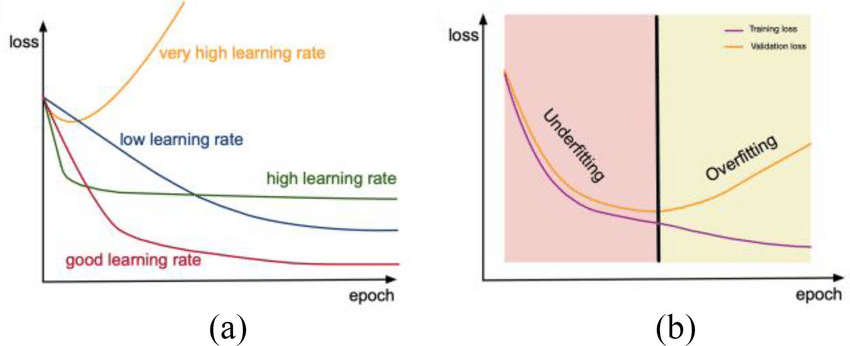

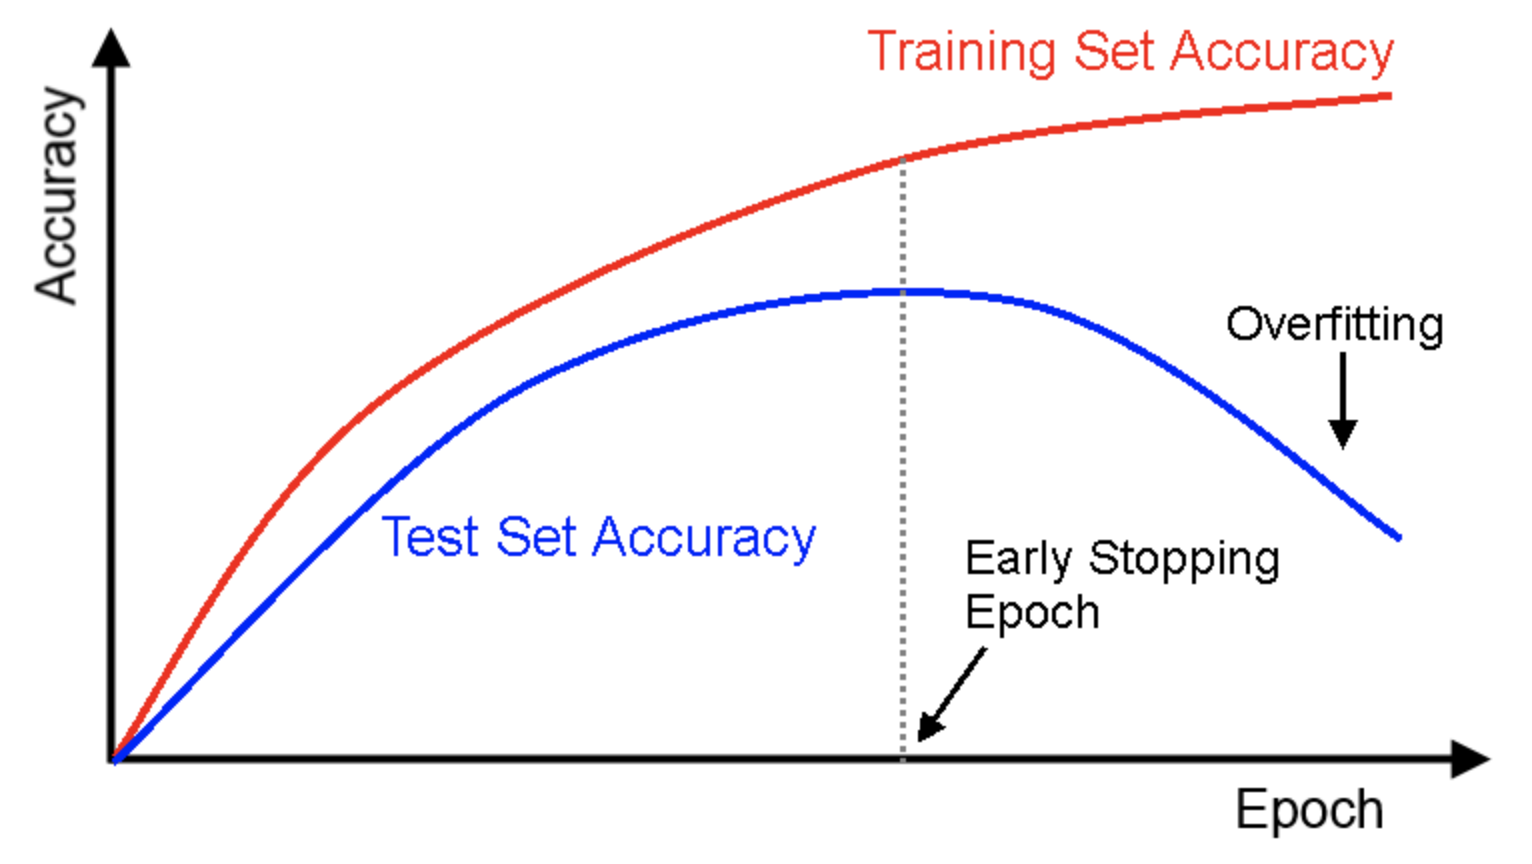

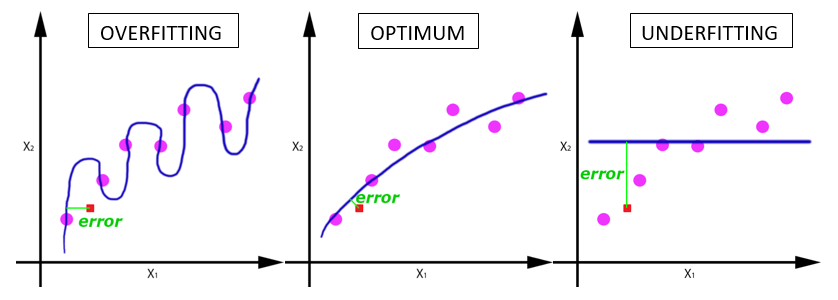

# این قسمت اضافی است و شامل مدل های دیگر است و شامل فایل تمرین نیست. صرفا برای این است که اگر نمره امتیازی داشته باشد به دست آوریم م. در کل این بخش جزوه فایل تمرین نیست و برای عمل بیشتر روی مطالب است.

# مدل های دیگر

با توجه به مقادیری که بهترین خروجی را در مرحله قبل داشتند.

در این قسمت با ساخت مدل های دیگر سعی بر مقایسه تابع های فعال ساز نیز اچام می دهیم. داریم

In [ ]:
model_5= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='tanh'),
#dense layer 2
Dense(5, activation='tanh'),
# dense layer 2
Dense(2, activation='tanh'),
# output layer
Dense(1,activation="sigmoid"),
])

In [ ]:
model_5.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])


In [ ]:
model_5.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)

Epoch 1/30
19/19 [==============================] - 1s 12ms/step - loss: 0.2287 - accuracy: 0.6319 - val_loss: 0.2231 - val_accuracy: 0.6374
Epoch 2/30
19/19 [==============================] - 0s 5ms/step - loss: 0.2177 - accuracy: 0.6566 - val_loss: 0.2131 - val_accuracy: 0.6703
Epoch 3/30
19/19 [==============================] - 0s 5ms/step - loss: 0.2082 - accuracy: 0.7253 - val_loss: 0.2037 - val_accuracy: 0.7143
Epoch 4/30
19/19 [==============================] - 0s 5ms/step - loss: 0.1985 - accuracy: 0.7253 - val_loss: 0.1941 - val_accuracy: 0.7363
Epoch 5/30
19/19 [==============================] - 0s 5ms/step - loss: 0.1886 - accuracy: 0.7610 - val_loss: 0.1846 - val_accuracy: 0.7912
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.8434 - val_loss: 0.1747 - val_accuracy: 0.8242
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.8214 - val_loss: 0.1655 - val_accuracy: 0.8571
Epoch 8/30
19/19 [=

In [ ]:
y_predict_5 = model_5.predict(X_test, verbose=1)
y_predict_5 = y_predict_5 > 0.5

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(classification_report(y_test,y_predict_5))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        69
         1.0       1.00      0.91      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92        69
         1.0       0.84      0.96      0.90        45

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

[[61  8]
 [ 2 43]]

با توجه به موارد بالا با استفاده از تابع فعال ساز به درصد های خوبی هم از جهات ریکال داده ۱ و هم از جهت دقت می رسیم/

[[69  0]
 [ 4 41]]


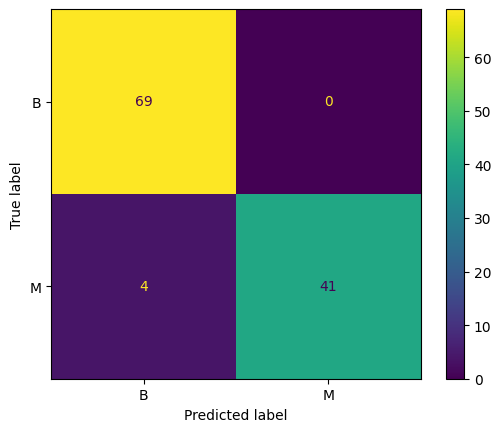

In [ ]:
confusion_matrix_5 = metrics.confusion_matrix(y_test,y_predict_5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_5 , display_labels = ['B', 'M'])
print(confusion_matrix_5)
cm_display.plot()
plt.show()

با تابع فعال ساز

exponential

In [ ]:
model_6= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='exponential'),
#dense layer 2
Dense(5, activation='exponential'),
# dense layer 2
Dense(2, activation='exponential'),
# output layer
Dense(1,activation="sigmoid"),
])

In [ ]:
model_6.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_6.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_6 = model_6.predict(X_test, verbose=1)
y_predict_6 = y_predict_6 > 0.5

Epoch 1/30
19/19 [==============================] - 2s 18ms/step - loss: nan - accuracy: 0.3681 - val_loss: nan - val_accuracy: 0.6374
Epoch 2/30
19/19 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6319 - val_loss: nan - val_accuracy: 0.6374
Epoch 3/30
19/19 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6319 - val_loss: nan - val_accuracy: 0.6374
Epoch 4/30
19/19 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6319 - val_loss: nan - val_accuracy: 0.6374
Epoch 5/30
19/19 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6319 - val_loss: nan - val_accuracy: 0.6374
Epoch 6/30
19/19 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6319 - val_loss: nan - val_accuracy: 0.6374
Epoch 7/30
19/19 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6319 - val_loss: nan - val_accuracy: 0.6374
Epoch 8/30
19/19 [==============================] - 0s 6ms/st

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

[[69  0]
 [45  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


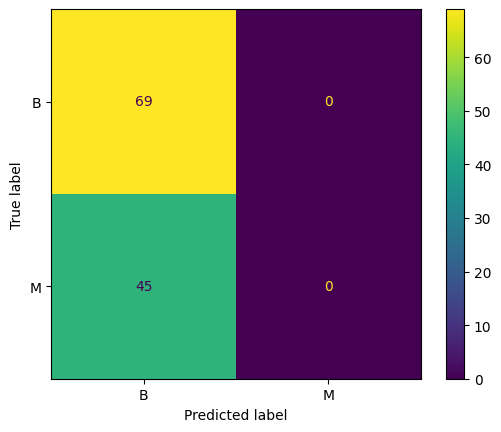

In [ ]:
print(classification_report(y_test,y_predict_6))
confusion_matrix_6 = metrics.confusion_matrix(y_test,y_predict_6)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_6 , display_labels = ['B', 'M'])
print(confusion_matrix_6)
cm_display.plot()
plt.show()

         0.0       0.00      0.00      0.00        69
         1.0       0.39      1.00      0.57        45

    accuracy                           0.39       114
   macro avg       0.20      0.50      0.28       114
weighted avg       0.16      0.39      0.22       114

[[ 0 69]
 [ 0 45]]

با توجه به درصد های بالا این تابع فعال ساز تابع مناسبی نمی باید با توجه به اینکه عملا پیش بینی آن بی فایده است. با توجه به داده ها در یک بهینه محلی افتاده است.



با تابع فعال ساز سیگوید

In [ ]:
model_7= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation="sigmoid"),
#dense layer 2
Dense(5, activation="sigmoid"),
# dense layer 2
Dense(2, activation="sigmoid"),
# output layer
Dense(1,activation="sigmoid"),
])

In [ ]:
model_7.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_7.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_7 = model_7.predict(X_test, verbose=1)
y_predict_7 = y_predict_7 > 0.5

Epoch 1/30
19/19 [==============================] - 1s 13ms/step - loss: 0.2325 - accuracy: 0.6319 - val_loss: 0.2308 - val_accuracy: 0.6374
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.6319 - val_loss: 0.2307 - val_accuracy: 0.6374
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.6319 - val_loss: 0.2306 - val_accuracy: 0.6374
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2321 - accuracy: 0.6319 - val_loss: 0.2305 - val_accuracy: 0.6374
Epoch 5/30
19/19 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.6319 - val_loss: 0.2304 - val_accuracy: 0.6374
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.6319 - val_loss: 0.2303 - val_accuracy: 0.6374
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2317 - accuracy: 0.6319 - val_loss: 0.2301 - val_accuracy: 0.6374
Epoch 8/30
19/19 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

[[69  0]
 [45  0]]


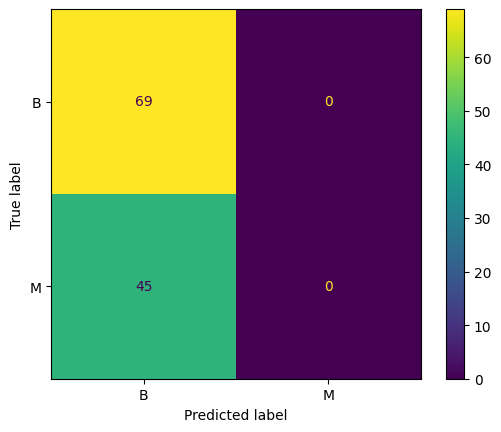

In [ ]:
print(classification_report(y_test,y_predict_7))
confusion_matrix_7 = metrics.confusion_matrix(y_test,y_predict_7)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_7 , display_labels = ['B', 'M'])
print(confusion_matrix_7)
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

[[69  0]
 [45  0]]

با توجه به درصد های بالا به وضوح این تابع فعال ساز نیز مناسب نمی باشد و دقت پایینی دارد و مطلوب نیست.

با استفاده از تابع فعال ساز softmax

In [ ]:
model_8= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation="softmax"),
#dense layer 2
Dense(5, activation="softmax"),
# dense layer 2
Dense(2, activation="softmax"),
# output layer
Dense(1,activation="sigmoid"),
])

In [ ]:
model_8.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_8.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_8 = model_8.predict(X_test, verbose=1)
y_predict_8 = y_predict_8 > 0.5

Epoch 1/30
19/19 [==============================] - 1s 13ms/step - loss: 0.3302 - accuracy: 0.3681 - val_loss: 0.3289 - val_accuracy: 0.3626
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.3681 - val_loss: 0.3233 - val_accuracy: 0.3626
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.3681 - val_loss: 0.3179 - val_accuracy: 0.3626
Epoch 4/30
19/19 [==============================] - 0s 5ms/step - loss: 0.3136 - accuracy: 0.3681 - val_loss: 0.3123 - val_accuracy: 0.3626
Epoch 5/30
19/19 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.3681 - val_loss: 0.3071 - val_accuracy: 0.3626
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.3681 - val_loss: 0.3023 - val_accuracy: 0.3626
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2987 - accuracy: 0.3681 - val_loss: 0.2975 - val_accuracy: 0.3626
Epoch 8/30
19/19 [=

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

[[69  0]
 [45  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


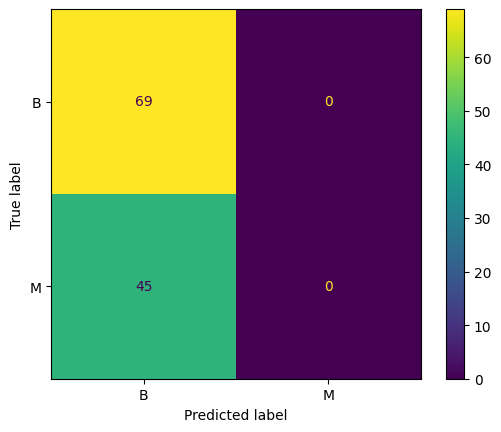

In [ ]:
print(classification_report(y_test,y_predict_8))
confusion_matrix_8 = metrics.confusion_matrix(y_test,y_predict_8)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_8 , display_labels = ['B', 'M'])
print(confusion_matrix_8)
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75        69
         1.0       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114

[[69  0]
 [45  0]]

این مورد نیز به وضوح تابع فعال ساز مناسبی نمی باشد و عملا مدل بی فایده است. با توجه به مقدایر خروجی در یک بهینه محلی افتاده است.

# مقایسه مدل ها بر مبنای تابع های فعال ساز

همانگونه که مشهود است بر حسب تعداد دوره ۳۰ و نرخ یادگیری ۰.۰۰۱ که از مرحله قبل به عنوان هایپر پارامتر ها استخراج کردیم، همان مدل برحسب تابع فعال ساز تانژانت هایپربولیک در لایه های پنهان بهترین مدل است.  با توجه به مقدار دقت و ریکال داده بدخیم.

# مقایسه مدل ها برحسب تعداد لایه نهان

بهترین مدل قبل را برحسب لایه نهان مقایسه می کنیم.

با دو لابه نهان

Epoch 1/30
19/19 [==============================] - 1s 12ms/step - loss: 0.2589 - accuracy: 0.4231 - val_loss: 0.2381 - val_accuracy: 0.6813
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.7280 - val_loss: 0.2223 - val_accuracy: 0.6374
Epoch 3/30
19/19 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.6319 - val_loss: 0.2134 - val_accuracy: 0.6374
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2090 - accuracy: 0.6319 - val_loss: 0.2044 - val_accuracy: 0.6484
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1994 - accuracy: 0.6758 - val_loss: 0.1951 - val_accuracy: 0.7253
Epoch 6/30
19/19 [==============================] - 0s 3ms/step - loss: 0.1897 - accuracy: 0.8077 - val_loss: 0.1849 - val_accuracy: 0.8352
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1780 - accuracy: 0.8269 - val_loss: 0.1739 - val_accuracy: 0.8462
Epoch 8/30
19/19 [=

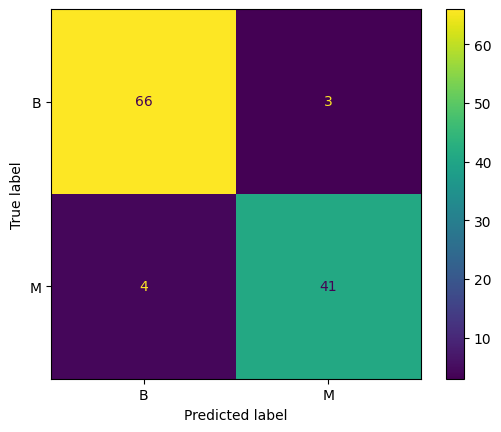

In [ ]:
model_9= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='tanh'),
#dense layer 2
Dense(5, activation='tanh'),

# output layer
Dense(1,activation="sigmoid"),
])
model_9.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_9.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_9= model_9.predict(X_test, verbose=1)
y_predict_9 = y_predict_9 > 0.5
print(classification_report(y_test,y_predict_9))
confusion_matrix_9 = metrics.confusion_matrix(y_test,y_predict_9)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_9 , display_labels = ['B', 'M'])
print(confusion_matrix_9)
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        69
         1.0       0.93      0.91      0.92        45

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

[[66  3]
 [ 4 41]]

با یک لایه نهان

Epoch 1/30
19/19 [==============================] - 1s 12ms/step - loss: 0.2338 - accuracy: 0.6841 - val_loss: 0.2306 - val_accuracy: 0.6593
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.6841 - val_loss: 0.2226 - val_accuracy: 0.6923
Epoch 3/30
19/19 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.7115 - val_loss: 0.2150 - val_accuracy: 0.7253
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2061 - accuracy: 0.7170 - val_loss: 0.2071 - val_accuracy: 0.7253
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1979 - accuracy: 0.7253 - val_loss: 0.1995 - val_accuracy: 0.7363
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1900 - accuracy: 0.8104 - val_loss: 0.1913 - val_accuracy: 0.8352
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.8324 - val_loss: 0.1832 - val_accuracy: 0.8352
Epoch 8/30
19/19 [=

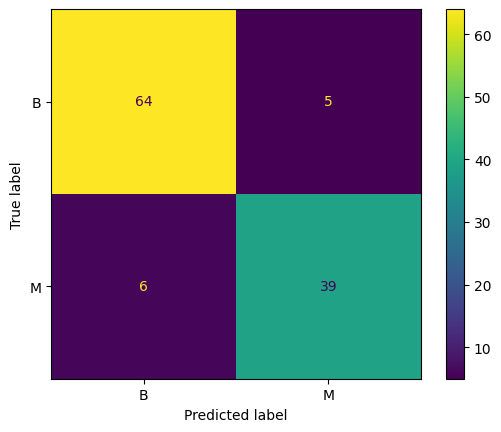

In [ ]:
model_10= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='tanh'),


# output layer
Dense(1,activation="sigmoid"),
])
model_10.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_10.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_10= model_10.predict(X_test, verbose=1)
y_predict_10 = y_predict_10 > 0.5
print(classification_report(y_test,y_predict_10))
confusion_matrix_10 = metrics.confusion_matrix(y_test,y_predict_10)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_10 , display_labels = ['B', 'M'])
print(confusion_matrix_10)
cm_display.plot()
plt.show()

    precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        69
         1.0       0.89      0.87      0.88        45

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

[[64  5]
 [ 6 39]]

به دقت نسبتا مناسبی رسیدیم هر چند دقت قبلی بهتر بود.

بدون لایه نهان

Epoch 1/30
19/19 [==============================] - 1s 11ms/step - loss: 0.2511 - accuracy: 0.6346 - val_loss: 0.2513 - val_accuracy: 0.6374
Epoch 2/30
19/19 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.6319 - val_loss: 0.2499 - val_accuracy: 0.6374
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.6319 - val_loss: 0.2485 - val_accuracy: 0.6374
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.6319 - val_loss: 0.2472 - val_accuracy: 0.6374
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2453 - accuracy: 0.6319 - val_loss: 0.2459 - val_accuracy: 0.6484
Epoch 6/30
19/19 [==============================] - 0s 6ms/step - loss: 0.2441 - accuracy: 0.6319 - val_loss: 0.2444 - val_accuracy: 0.6484
Epoch 7/30
19/19 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.6319 - val_loss: 0.2431 - val_accuracy: 0.6484
Epoch 8/30
19/19 [=

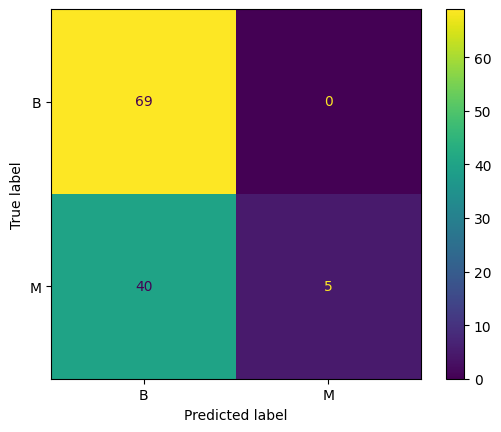

In [ ]:

model_11= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),



# output layer
Dense(1,activation="sigmoid"),
])
model_11.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_11.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_11= model_11.predict(X_test, verbose=1)
y_predict_11 = y_predict_11 > 0.5
print(classification_report(y_test,y_predict_11))
confusion_matrix_11 = metrics.confusion_matrix(y_test,y_predict_11)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_11 , display_labels = ['B', 'M'])
print(confusion_matrix_11)
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78        69
         1.0       1.00      0.11      0.20        45

    accuracy                           0.65       114
   macro avg       0.82      0.56      0.49       114
weighted avg       0.78      0.65      0.55       114

[[69  0]
 [40  5]]

همانگوه که مشهود است با کاهش تعداد لایه نهان و این جا رسیدن به صفر دقت بسیار کاهش پیدا کرد. اگر به خاطر داشته باشید دقت در مدل اول قسمت قبل بیشتر از  ۹۰ بود و گاهی مقادیر ۹۸ درصد نیز می رسید. از اینرو تعداد لایه ها تاثیر مستقیم در دقت دارد.

# مقایسه بر مبنای تعداد نورون ها

In [ ]:
model_12= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(20, activation='tanh'),
#dense layer 2
Dense(20, activation='tanh'),
Dense(20, activation='tanh'),
# output layer
Dense(1,activation="sigmoid"),
])
model_12.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_12.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_12= model_12.predict(X_test, verbose=1)
y_predict_12 = y_predict_12 > 0.5
print(classification_report(y_test,y_predict_12))
confusion_matrix_12 = metrics.confusion_matrix(y_test,y_predict_12)

Epoch 1/30
19/19 [==============================] - 1s 14ms/step - loss: 0.2281 - accuracy: 0.6319 - val_loss: 0.2200 - val_accuracy: 0.6593
Epoch 2/30
19/19 [==============================] - 0s 5ms/step - loss: 0.2070 - accuracy: 0.7005 - val_loss: 0.1991 - val_accuracy: 0.7692
Epoch 3/30
19/19 [==============================] - 0s 7ms/step - loss: 0.1817 - accuracy: 0.8407 - val_loss: 0.1711 - val_accuracy: 0.8132
Epoch 4/30
19/19 [==============================] - 0s 6ms/step - loss: 0.1504 - accuracy: 0.8352 - val_loss: 0.1390 - val_accuracy: 0.9121
Epoch 5/30
19/19 [==============================] - 0s 6ms/step - loss: 0.1182 - accuracy: 0.8846 - val_loss: 0.1104 - val_accuracy: 0.9231
Epoch 6/30
19/19 [==============================] - 0s 8ms/step - loss: 0.0946 - accuracy: 0.9066 - val_loss: 0.0890 - val_accuracy: 0.9121
Epoch 7/30
19/19 [==============================] - 0s 7ms/step - loss: 0.0785 - accuracy: 0.9093 - val_loss: 0.0782 - val_accuracy: 0.9341
Epoch 8/30
19/19 [=

[[66  3]
 [ 2 43]]


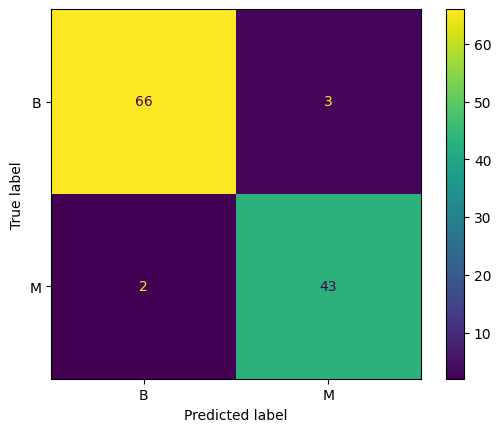

In [ ]:

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_12 , display_labels = ['B', 'M'])
print(confusion_matrix_12)
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        69
         1.0       0.93      0.96      0.95        45

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

[[66  3]
 [ 2 43]]

In [ ]:
model_13= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(10, activation='tanh'),
#dense layer 2
Dense(10, activation='tanh'),
Dense(10, activation='tanh'),
# output layer
Dense(1,activation="sigmoid"),
])
model_13.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_13.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_13= model_13.predict(X_test, verbose=1)
y_predict_13 = y_predict_13 > 0.5
print(classification_report(y_test,y_predict_13))
confusion_matrix_13 = metrics.confusion_matrix(y_test,y_predict_13)

Epoch 1/30
19/19 [==============================] - 1s 14ms/step - loss: 0.2306 - accuracy: 0.6346 - val_loss: 0.2243 - val_accuracy: 0.6484
Epoch 2/30
19/19 [==============================] - 0s 5ms/step - loss: 0.2201 - accuracy: 0.6593 - val_loss: 0.2152 - val_accuracy: 0.7143
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2096 - accuracy: 0.7418 - val_loss: 0.2035 - val_accuracy: 0.7253
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1966 - accuracy: 0.7308 - val_loss: 0.1896 - val_accuracy: 0.7692
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.8104 - val_loss: 0.1736 - val_accuracy: 0.8022
Epoch 6/30
19/19 [==============================] - 0s 5ms/step - loss: 0.1633 - accuracy: 0.8571 - val_loss: 0.1551 - val_accuracy: 0.8901
Epoch 7/30
19/19 [==============================] - 0s 5ms/step - loss: 0.1438 - accuracy: 0.8571 - val_loss: 0.1383 - val_accuracy: 0.9121
Epoch 8/30
19/19 [=

[[51 18]
 [ 0 45]]


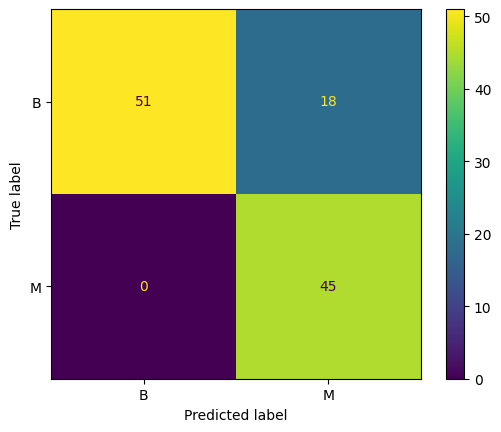

In [ ]:

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_13 , display_labels = ['B', 'M'])
print(confusion_matrix_13)
cm_display.plot()
plt.show()

[[51 18]
 [ 0 45]]

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85        69
         1.0       0.71      1.00      0.83        45

    accuracy                           0.84       114
   macro avg       0.86      0.87      0.84       114
weighted avg       0.89      0.84      0.84       114

In [ ]:
model_14= Sequential([
  #Input layer
tf.keras.Input(input_shape[0]),
# dense layer 1
Dense(2, activation='tanh'),
#dense layer 2
Dense(2, activation='tanh'),
Dense(2, activation='tanh'),
# output layer
Dense(1,activation="sigmoid"),
])
model_14.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy'])
model_14.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)
y_predict_14= model_14.predict(X_test, verbose=1)
y_predict_14 = y_predict_4 > 0.5
print(classification_report(y_test,y_predict_14))
confusion_matrix_14 = metrics.confusion_matrix(y_test,y_predict_14)

Epoch 1/30
19/19 [==============================] - 2s 12ms/step - loss: 0.2492 - accuracy: 0.6593 - val_loss: 0.2484 - val_accuracy: 0.6374
Epoch 2/30
19/19 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.6319 - val_loss: 0.2469 - val_accuracy: 0.6374
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.6319 - val_loss: 0.2449 - val_accuracy: 0.6374
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2433 - accuracy: 0.6319 - val_loss: 0.2424 - val_accuracy: 0.6374
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2406 - accuracy: 0.6319 - val_loss: 0.2396 - val_accuracy: 0.6374
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.6319 - val_loss: 0.2366 - val_accuracy: 0.6374
Epoch 7/30
19/19 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.6319 - val_loss: 0.2331 - val_accuracy: 0.6374
Epoch 8/30
19/19 [=

[[64  5]
 [ 1 44]]


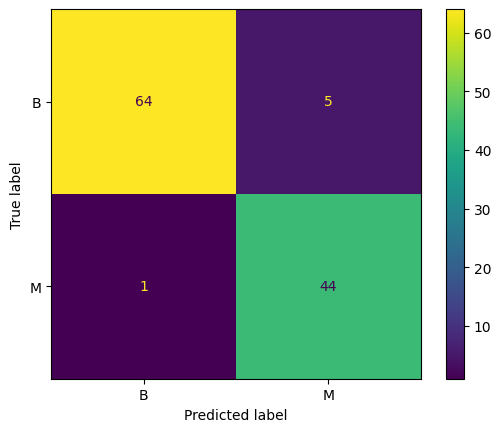

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_14 , display_labels = ['B', 'M'])
print(confusion_matrix_14)
cm_display.plot()
plt.show()

هر چند تفاوت اندک است اما با تعداد نورون بیشتر به دقت بهتری می رسیم


با تعداد نورون ۱۰ دقتی در حدود ۸۰ درصد داریم.
در حالتی که به ازای نورون ۲۰ دقتی در حدود بیشتر از ۹۵ درصد دایم و با دو نوروننیز دقت نسبتا خوبی داریم. در هر صورت در این مدل نورون ۲۰ بهتر عمل میکند. توجه کنید منظور تعداد نورون در لایه های پنهان است.